<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [10]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [11]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [12]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [13]:
import pandas as pd
from scipy import stats

def generate_stat_description(data):
    description = {}
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type == 'object':
            # Compute mode for object columns
            mode = data[col].mode().tolist() if not data[col].mode().empty else ['No mode']
            unique_counts = data[col].value_counts().to_dict()
            description[col] = {
                'type': 'object', 
                'unique_values': dict(unique_counts),
                'mode': mode
            }
        elif col_type in ['int64', 'float64']:
            # Define statistics for numerical columns
            stats_dict = {
                'mean': data[col].mean(),
                'median': data[col].median(),
                'mode': data[col].mode().tolist(),
                'std': data[col].std(),
                'min': data[col].min(),
                'max': data[col].max(),
                '25%': data[col].quantile(0.25),
                '50%': data[col].quantile(0.50),
                '75%': data[col].quantile(0.75)
            }
            description[col] = stats_dict
        else:
            # Skip other data types (for now)
            description[col] = {'type': col_type}
    
    return description

def main(file_path):
    # Step 1: Import the dataset from CSV
    df = pd.read_csv(file_path)
    
    # Step 2: Generate the statistical description
    stats = generate_stat_description(df)
    
    # Print the statistical description
    for col, desc in stats.items():
        print(f"Column: {col}")
        if isinstance(desc, dict):
            for key, value in desc.items():
                if key == 'unique_values':
                    print(f"  {key}: {value}")
                elif key == 'mode':
                    print(f"  {key}: {value}")
                else:
                    print(f"  {key}: {value}")
        print()

# Usage
file_path = 'dataset.csv'  # Replace with your actual CSV file path
main(file_path)

Column: Unnamed: 0.1
  mean: 118.5
  median: 118.5
  mode: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 

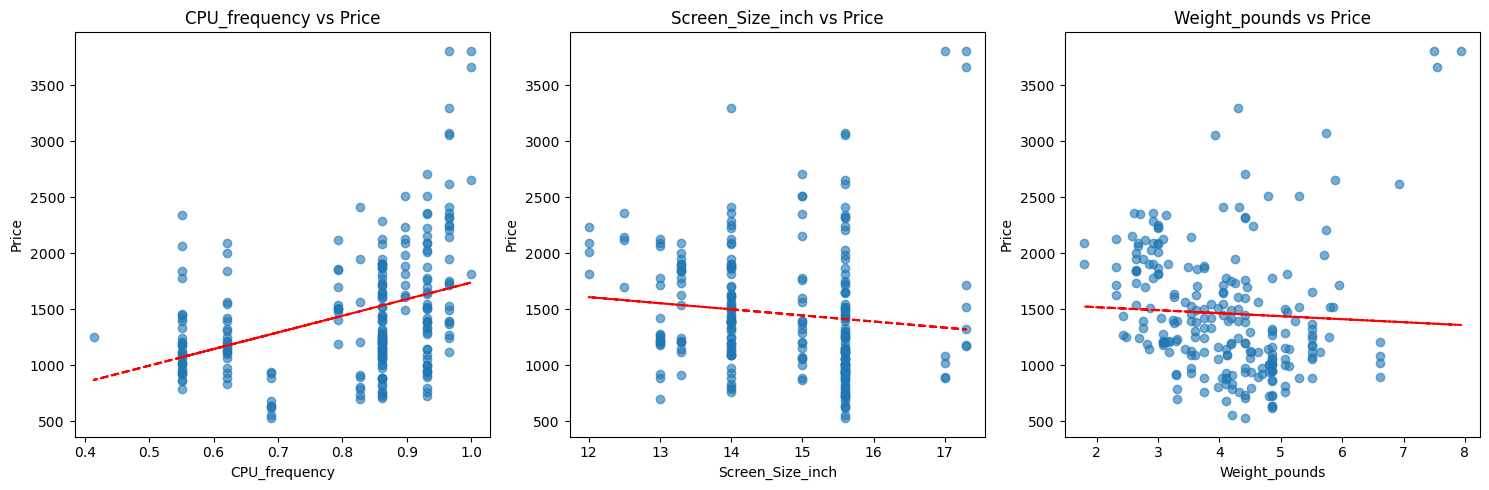

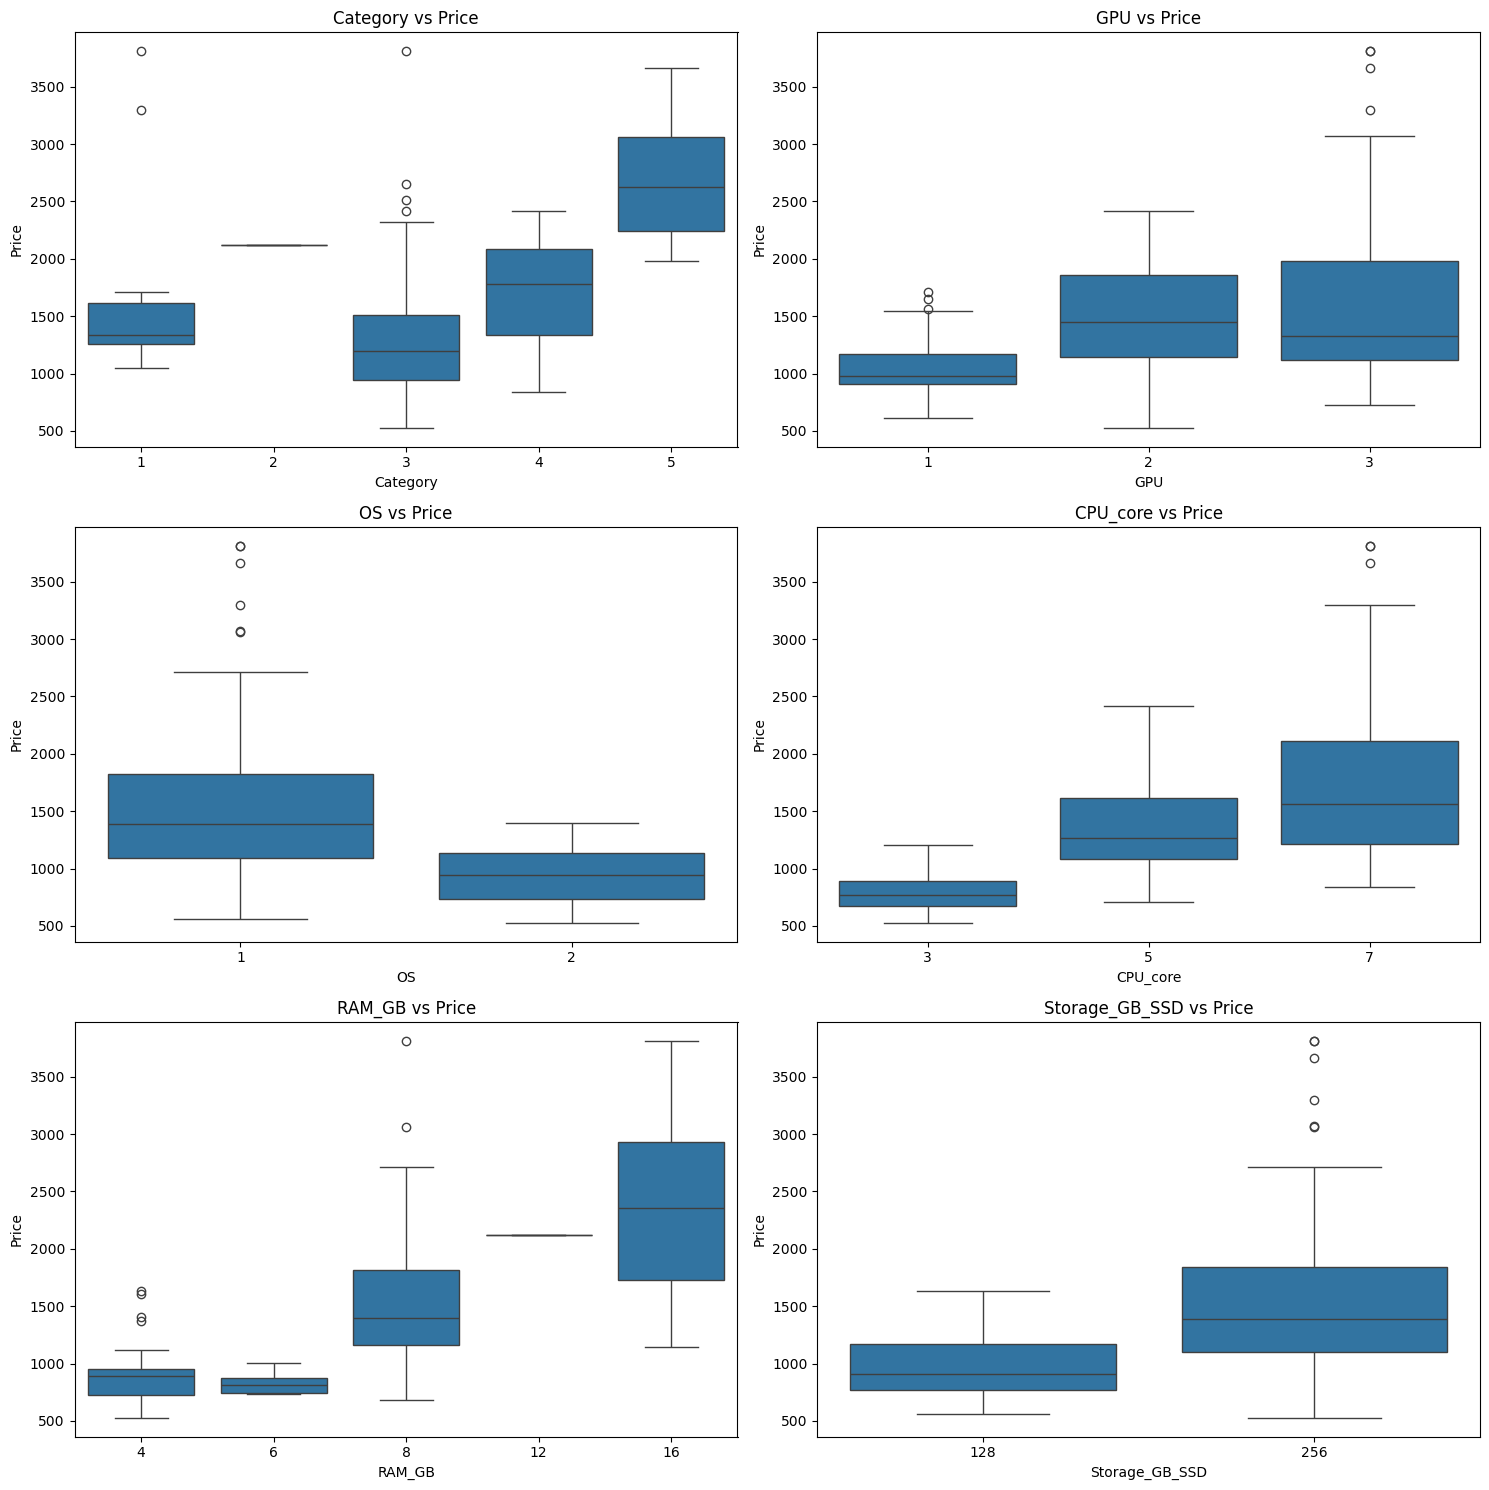

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

def create_regression_plots(df):
    # Select columns
    X = df[['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']]
    y = df['Price']
    
    # Create subplots
    fig, axes = plt.subplots(1, len(X.columns), figsize=(15, 5))
    for ax, col in zip(axes, X.columns):
        ax.scatter(df[col], df['Price'], alpha=0.6)
        ax.set_title(f'{col} vs Price')
        z = np.polyfit(df[col], df['Price'], 1)
        p = np.poly1d(z)
        ax.plot(df[col], p(df[col]), "r--")
        ax.set_xlabel(col)
        ax.set_ylabel('Price')
    
    plt.tight_layout()
    plt.show()

def create_box_plots(df):
    # Define categorical columns
    categorical_columns = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
    
    # Create a subplot grid for box plots
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    axs = axs.flatten()  # to use them in a loop
    
    for ax, col in zip(axs, categorical_columns):
        sns.boxplot(x=col, y='Price', data=df, ax=ax)
        ax.set_title(f'{col} vs Price')
        ax.set_xlabel(col)
        ax.set_ylabel('Price')
    
    plt.tight_layout()
    plt.show()

def main(df):
    create_regression_plots(df)
    create_box_plots(df)

# Suponiendo que 'df' es el DataFrame cargado desde CSV 
df = pd.read_csv(file_path)
main(df)


In [18]:
from scipy.stats import pearsonr

# Assuming 'data.csv' is the dataset
df = pd.read_csv(file_path)

# Separating numerical features and the target variable 'Price'
X = df.select_dtypes(include=['int64', 'float64']).drop('Price', axis=1)
y = df['Price']

# Dictionary to store results
corr_stats = {}

# Loop through each numerical feature to compute Pearson coefficients and p-values
for feature in X.columns:
    corr, p_value = pearsonr(X[feature], y)
    corr_stats[feature] = {'Correlation': corr, 'P-value': p_value}

#Convert results to DataFrame
results_df = pd.DataFrame.from_dict(corr_stats, orient='index')

# Print the results
print(results_df)

                  Correlation       P-value
Unnamed: 0.1         0.321933  3.851058e-07
Unnamed: 0           0.321933  3.851058e-07
Category             0.286243  7.225696e-06
GPU                  0.288298  6.166950e-06
OS                  -0.221730  5.696643e-04
CPU_core             0.459398  7.912950e-14
Screen_Size_inch    -0.110644  8.853398e-02
CPU_frequency        0.366666  5.502463e-09
RAM_GB               0.549297  3.681561e-20
Storage_GB_SSD       0.243421  1.489892e-04
Weight_pounds       -0.050312  4.397694e-01
Screen-Full_HD      -0.021075  7.463568e-01
Screen-IPS_panel     0.021075  7.463568e-01


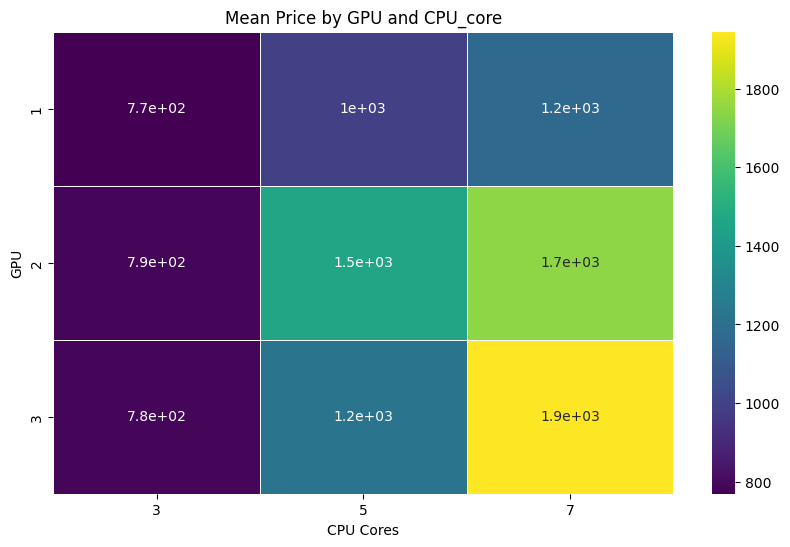

In [19]:


# Assuming 'df' is already defined
# Example of 'df' structure:
#   GPU   CPU_core   Price
# 0  A       4         1000
# 1  A       8         1200
# 2  B       4         1150
# 3  B       8         1300
# 4  C       4         900
# 5  C       8         1050

# Step 1: Group and calculate mean of 'Price'
grouped_df = df.groupby(['GPU', 'CPU_core'])['Price'].mean().reset_index()

# Step 2: Create a pivot table
pivot_table = pd.pivot_table(grouped_df, values='Price', index=['GPU'], columns=['CPU_core'], aggfunc='mean')

# Step 3: Plot a pcolor plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', linewidths=.5)
plt.title('Mean Price by GPU and CPU_core')
plt.xlabel('CPU Cores')
plt.ylabel('GPU')
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
